In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100, 1)

In [4]:
y = 4+3*X+np.random.randn(100, 1)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

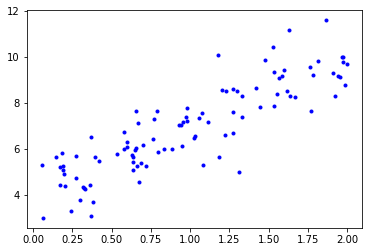

In [18]:
plt.plot(X, y, 'b.')
plt.show()

In [9]:
X_b = np.c_[np.ones((100, 1)), X]

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.02239383],
       [2.94510578]])

In [12]:
X_new = np.array([[0], [2]])

In [13]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [14]:
y_predict = X_new_b.dot(theta_best)

In [15]:
y_predict

array([[4.02239383],
       [9.91260539]])

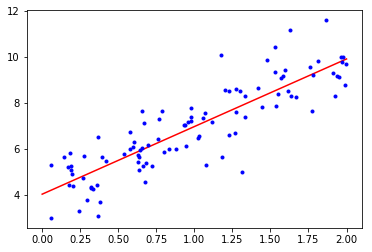

In [17]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
lin_reg.intercept_

array([4.02239383])

In [24]:
lin_reg.coef_

array([[2.94510578]])

In [25]:
lin_reg.predict(X_new)

array([[4.02239383],
       [9.91260539]])

In [27]:
from sklearn.linear_model import SGDRegressor

In [28]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [32]:
sgd_reg.fit(X, y)

/Users/Teresa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/Teresa/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [33]:
sgd_reg.intercept_

array([4.00369294])

In [34]:
sgd_reg.coef_

array([2.92563472])

In [35]:
m=100

In [36]:
X=6*np.random.rand(m,1)-3

In [37]:
y=0.5*X**2+X+2+np.random.randn(m,1)

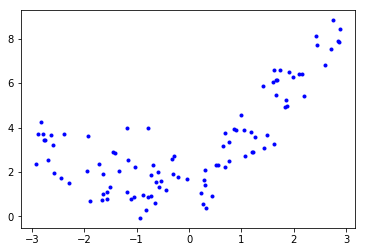

In [38]:
plt.plot(X, y, 'b.')
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [41]:
X_poly = poly_features.fit_transform(X)

In [42]:
X[0]

array([-0.67821828])

In [43]:
X_poly[0]

array([-0.67821828,  0.45998003])

In [44]:
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
lin_reg.intercept_

array([1.90468872])

In [47]:
lin_reg.coef_

array([[0.93438565, 0.50901084]])

In [48]:
y_pred = lin_reg.predict(X_poly)

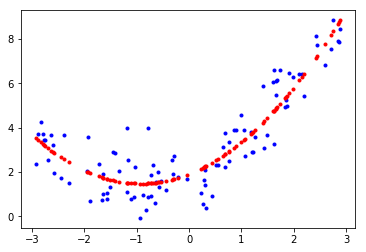

In [54]:
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r.')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [63]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')

In [64]:
lin_reg = LinearRegression()

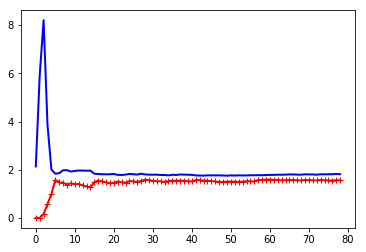

In [65]:
plot_learning_curves(lin_reg, X,y)

In [66]:
from sklearn.pipeline import Pipeline

In [70]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression())
])

(0, 5)

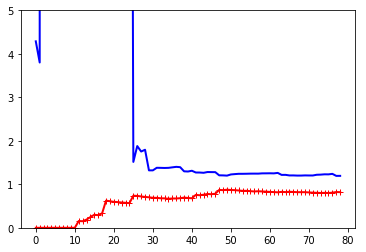

In [72]:
plot_learning_curves(polynomial_regression, X, y)
plt.ylim([0, 5])

In [73]:
from sklearn.linear_model import Ridge

In [74]:
ridge_reg = Ridge(alpha=1, solver='cholesky')

In [75]:
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [76]:
ridge_reg.predict([[1.5]])

array([[4.58851415]])

In [77]:
sgd_reg = SGDRegressor(penalty='l2')

In [79]:
sgd_reg.fit(X,y.ravel())

/Users/Teresa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [80]:
sgd_reg.predict([[1.5]])

array([3.75013235])

In [81]:
from sklearn.linear_model import Lasso

In [83]:
lasso_reg = Lasso(alpha=0.1)

In [84]:
lasso_reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
lasso_reg.predict([[1.5]])

array([4.53699655])

In [86]:
from sklearn.linear_model import ElasticNet

In [87]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [88]:
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
elastic_net.predict([[1.5]])

array([4.54163164])

In [91]:
from sklearn.base import clone

In [92]:
sgd_reg = SGDRegressor(n_iter=1,
                       warm_start=True,
                       penalty=None,
                       learning_rate='constant',
                       eta0=0.0005)

In [93]:
minimum_val_error=float('inf')

In [95]:
best_epoch = None

In [96]:
best_model = None

In [ ]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly)